In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Adam
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
np.random.seed(10)
  
# Read MNIST data
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()
  
# Translation of data
X_Train40 = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')
X_Test40 = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# Standardize feature data
X_Train40_norm = X_Train40 / 255
X_Test40_norm = X_Test40 /255
  
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [4]:
model = Sequential()
# Create CN layer 1  
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))

# Create Max-Pool 1
model.add(MaxPooling2D(pool_size=(2,2)))
  
# Create CN layer 2
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
  
# Create Max-Pool 2
model.add(MaxPooling2D(pool_size=(2,2)))
  
# Add Dropout layer  
model.add(Dropout(0.25))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

In [0]:
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()
print("")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [9]:
# 定義訓練方式
#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.005), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 開始訓練
train_fit_history = model.fit(x=X_Train40_norm, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=300, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 7s - loss: 0.4891 - acc: 0.8477 - val_loss: 0.0972 - val_acc: 0.9714
Epoch 2/20
 - 1s - loss: 0.1427 - acc: 0.9580 - val_loss: 0.0635 - val_acc: 0.9806
Epoch 3/20
 - 1s - loss: 0.1036 - acc: 0.9691 - val_loss: 0.0518 - val_acc: 0.9835
Epoch 4/20
 - 1s - loss: 0.0846 - acc: 0.9750 - val_loss: 0.0460 - val_acc: 0.9864
Epoch 5/20
 - 1s - loss: 0.0729 - acc: 0.9776 - val_loss: 0.0401 - val_acc: 0.9873
Epoch 6/20
 - 1s - loss: 0.0645 - acc: 0.9808 - val_loss: 0.0398 - val_acc: 0.9884
Epoch 7/20
 - 1s - loss: 0.0553 - acc: 0.9831 - val_loss: 0.0439 - val_acc: 0.9866
Epoch 8/20
 - 1s - loss: 0.0514 - acc: 0.9838 - val_loss: 0.0352 - val_acc: 0.9897
Epoch 9/20
 - 1s - loss: 0.0452 - acc: 0.9858 - val_loss: 0.0343 - val_acc: 0.9896
Epoch 10/20
 - 1s - loss: 0.0429 - acc: 0.9867 - val_loss: 0.0340 - val_acc: 0.9900
Epoch 11/20
 - 1s - loss: 0.0411 - acc: 0.9873 - val_loss: 0.0331 - val

In [10]:
score = model.evaluate(X_Train40, y_TrainOneHot)
print()
print("\t Accuracy of testing data = {:2.1f}%".format(score[1]*100.0))

60000/60000 [==============================] - 3s 45us/step

	 Accuracy of testing data = 99.7%


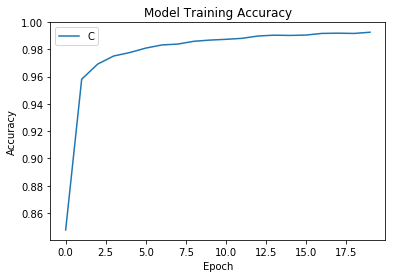

In [16]:
plt.plot(train_fit_history.history["acc"])

plt.title("Model Training Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend("CC", loc="best")
plt.show()

In [31]:
print("\t[Info] Show 10 prediction result (From 240):")  

#X = X_Test40_norm[0:10,:]
X = X_Test40_norm[240:250,:]
prediction = model.predict_classes(X)
print(prediction)

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 4 4 2]


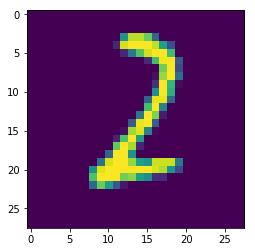

In [59]:
plt.imshow(X_Test[249])
plt.show() 

In [0]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  if num > 25: num = 25
  for i in range(0, num):
      ax=plt.subplot(5,5, 1+i)
      ax.imshow(images[idx], cmap='binary')
      title = "l=" + str(labels[idx])
      if len(prediction) > 0:
        title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))
      else:
        title = "l={}".format(str(labels[idx]))
      ax.set_title(title, fontsize=10)
      ax.set_xticks([]); ax.set_yticks([])
      idx+=1
  plt.show()  

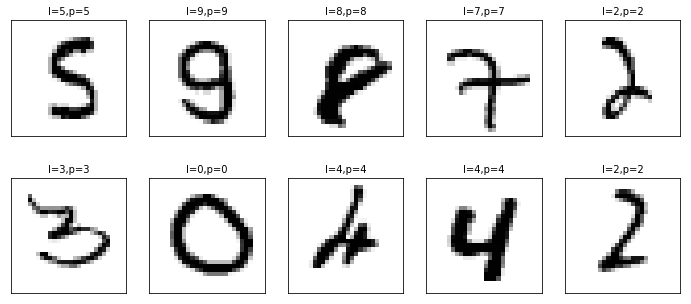

In [56]:
plot_images_labels_predict(X_Test, y_Test, prediction, idx=240)
plt.show()